# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat = []
lng = []
city_id = []
wind = []
hum = []
max_tmp = []
country = []
cloudiness = []
city_name = []
date = []

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        max_tmp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        date.append(response['dt'])
        #print(f"Processing {cities[city]} | {city}")
    except: KeyError 
        
       #print(f"No data returnd for " {city}: "skipping.")
        
        
    
    print(city)


namatanai
caceres
new norfolk
amderma
rikitea
koumac
marsaxlokk
mataura
atuona
torbay
kenai
kapaa
san pedro
lasa
flin flon
jamestown
tiksi
cape town
mount gambier
vaini
illoqqortoormiut
vysokogornyy
avarua
matamoros
grand gaube
albany
yeehaw junction
hofn
harindanga
tubruq
rio de jesus
bathsheba
seminole
port said
labe
hermanus
punta arenas
lagoa
sentyabrskiy
san jeronimo
viligili
taolanaro
thompson
barth
bluff
bredasdorp
chapais
ballina
lebu
kjustendil
ust-nera
tumannyy
butaritari
saskylakh
vaitupu
qaanaaq
mentok
ostrovnoy
sinnamary
guaranda
lakselv
cabo san lucas
mackenzie
auchterarder
victoria
shingu
sohag
barranca
port alfred
yellowknife
norman wells
busselton
ushuaia
saint anthony
puerto ayora
kainantu
la ronge
le port
eureka
barrow
mys shmidta
isangel
vestmannaeyjar
kieta
klaksvik
saldanha
pio xii
dolinsk
gurgan
port elizabeth
anchorage
pestravka
kimberley
husavik
porto novo
severo-kurilsk
faanui
puerto leguizamo
tamandare
flinders
tuktoyaktuk
saleaula
san jose
dikson
hithadhoo
t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_tmp,
    "Wind Speed": wind
    
}

weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file)

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Namatanai,71,PG,1580042604,77,-3.67,152.43,82.90,2.35
1,Caceres,1,ES,1580042604,79,39.52,-6.37,48.99,1.99
2,New Norfolk,73,AU,1580042604,56,-42.78,147.06,60.01,3.94
3,Rikitea,50,PF,1580042605,76,-23.12,-134.97,78.98,11.77
4,Koumac,100,NC,1580042605,85,-20.57,164.28,73.36,4.41


In [5]:
south_forgets = weather_df.loc[weather_df["Latitude"]<= 0, :]

south_forgets.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Namatanai,71,PG,1580042604,77,-3.67,152.43,82.90,2.35
2,New Norfolk,73,AU,1580042604,56,-42.78,147.06,60.01,3.94
3,Rikitea,50,PF,1580042605,76,-23.12,-134.97,78.98,11.77
4,Koumac,100,NC,1580042605,85,-20.57,164.28,73.36,4.41
6,Mataura,100,NZ,1580042605,84,-46.19,168.86,57.99,0.43


In [6]:
north_remembers = weather_df.loc[weather_df["Latitude"] >= 0, :]


north_remembers.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
1,Caceres,1,ES,1580042604,79,39.52,-6.37,48.99,1.99
5,Marsaxlokk,11,MT,1580042605,87,35.84,14.54,63.00,3.00
8,Torbay,7,CA,1580042605,83,47.67,-52.73,21.99,7.47
9,Kenai,0,US,1580042429,70,60.55,-151.26,3.99,4.00
10,Kapaa,32,US,1580042606,59,22.08,-159.32,72.00,6.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

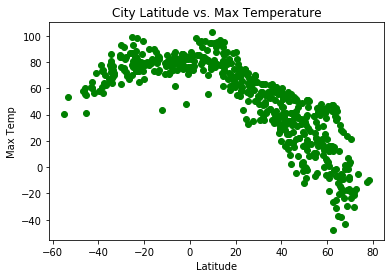

In [7]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(weather_df[["Latitude"]], weather_df[["Max Temperature"]], marker="o", color="green")
plt.show()

#### Latitude vs. Humidity Plot

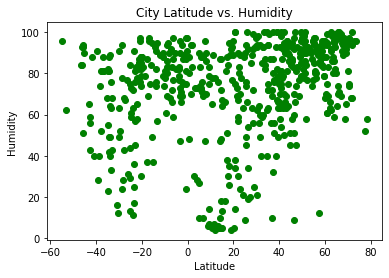

In [11]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(weather_df[["Latitude"]], weather_df[["Humidity"]], marker="o", color="green")
plt.show()

#### Latitude vs. Cloudiness Plot

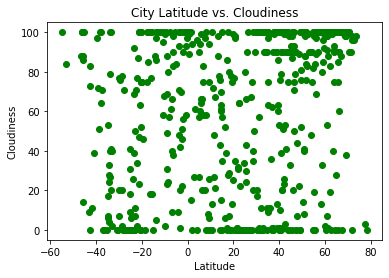

In [9]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(weather_df[["Latitude"]], weather_df[["Cloudiness"]], marker="o", color="green")
plt.show()

#### Latitude vs. Wind Speed Plot

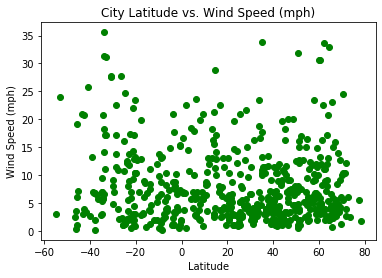

In [10]:
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(weather_df[["Latitude"]], weather_df[["Wind Speed"]], marker="o", color="green")
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames

# Coded this earlier in th 'north_remembers and sout_forgets dataframes'


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

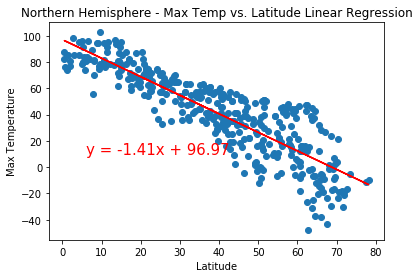

In [14]:
x_values = north_remembers['Latitude']
y_values = north_remembers['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

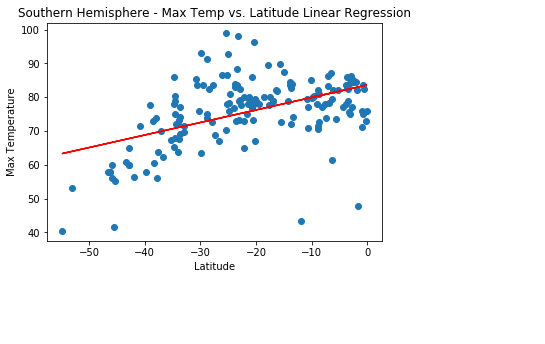

In [15]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

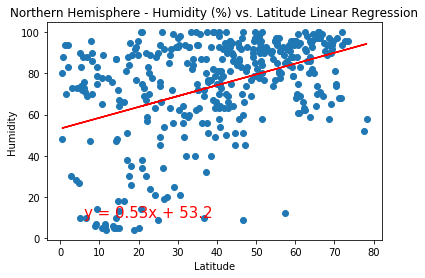

In [16]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

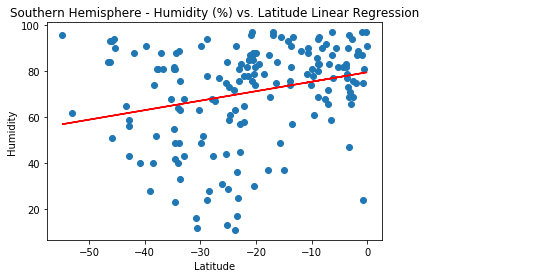

In [17]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

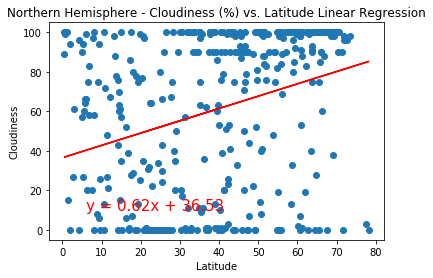

In [18]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

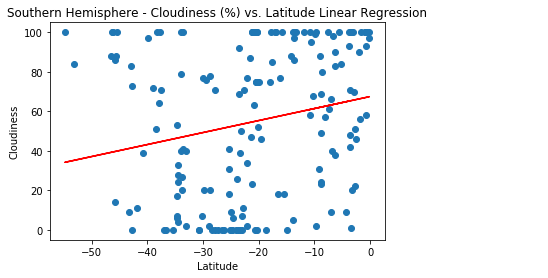

In [19]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

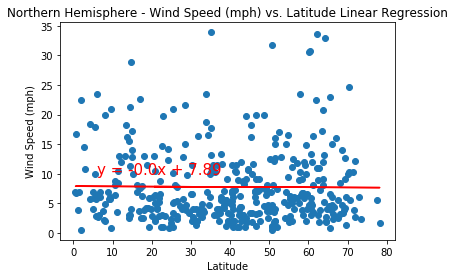

In [20]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

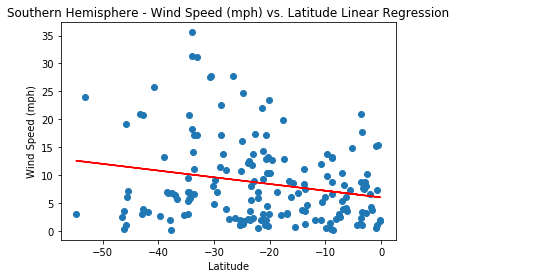

In [21]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()